In [3]:
import numpy as np
import math

# 简单的神经网络结构
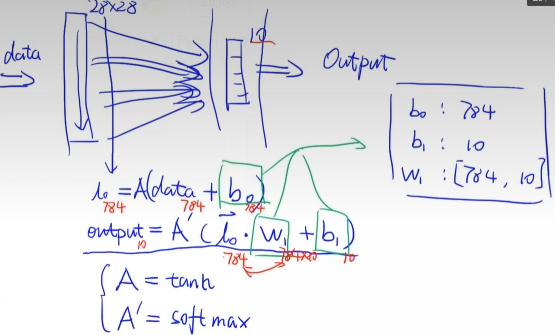
参考视频的link[弱鸡才用tensorflow，强者一个numpy就够：从零开始神经网络第一期_哔哩哔哩_bilibili](https://www.bilibili.com/video/BV1m4411x7KU/?spm_id_from=333.1007.top_right_bar_window_history.content.click&vd_source=4029b6d22d1e918089cf8b91446ed3e2)


In [4]:
def tanh(x):
    return np.tanh(x)
def softmax(x_list):
#     剪掉最大值，防止指数计算的时候指数过大，但是整体的值是不变的，因为相当于在上下都除以了一个常数
    exp=np.exp(x_list-x_list.max())
    return exp/exp.sum()

In [18]:
softmax(np.array([1,2,3,4]))

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [5]:
dimensions=[28*28,10]
activation=[tanh,softmax]
# 确定分布
distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]}
]

In [10]:
def init_parameter_b(layer):
    dist = distribution[layer]['b']
#    np.random.rand先生成0-1的随机数，然后再映射到b的分布区间中去
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]


def init_parameter_w(layer):
    dist = distribution[layer]['w']
#     首先是根据dimension生成一个dismensions[layer-1]*dismension[layer]的矩阵（0，1），然后将这个矩阵映射到其值域上去
# 这种方式要注意第0层是没有w的
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]


# 设计函数初始化第0层和第第一层的参数
def init_parameter():
#     和ditrbution一样建立一个表，存每个layer的parameter
    parameter=[]
    for index, i in enumerate(distribution):
        layer_parameter={}
        for j in i.keys():
            if j=='b':
                layer_parameter['b']=init_parameter_b(index)
            if j == 'w':
                layer_parameter['w']=init_parameter_w(index)
        parameter.append(layer_parameter)
    return parameter

In [11]:
# b1是784个0，b2是10个0，w是一个784*10的矩阵
init_parameter()

[{'b': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
def predict(img,parameters):
    l0_in=img+parameters